## Mari Sisco
### Data Preprocessing Preparation in order to generate a machine learning process for the severity of accidents in Maryland
### Maryland Traffic Data

The first step is to import all of the packages we will be using.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Investigating the Dataset: MD traffic 

One needs to obtain the basic information of the data, including the number of columns, number of rows, data type of each feature, summary information, etc. 

In [2]:
# We need to drop the ID column, State, Country
# Many missing values in Wind_Chill (F) 


df = pd.read_csv("mdtraffic.csv")
print(df.head(10))
print(df.shape)

         ID  Severity  Start_Lat  Start_Lng  Distance(mi)  \
0  A-228553         1  39.152046 -76.645584          0.01   
1  A-228554         2  39.152046 -76.645584          0.01   
2  A-228567         1  39.481083 -76.249626          0.01   
3  A-228574         1  39.158756 -76.718475          0.01   
4  A-228580         1  39.636391 -77.710457          0.01   
5  A-228630         2  39.031303 -77.130486          0.01   
6  A-228632         2  38.959663 -76.866058          0.01   
7  A-228641         2  39.419975 -76.640007          0.01   
8  A-228649         1  39.381805 -77.409721          0.01   
9  A-228650         1  39.286144 -77.271790          0.00   

                                         Description Side  \
0  Accident on MD-100 Eastbound at Exits 13A 13A-...    R   
1  Lane blocked and right hand shoulder blocked d...    R   
2  Accident on MD-7 Philadelphia Rd at MD-543 Riv...    R   
3  Accident on MD-100 near Exits 10 10A 10B MD-71...    R   
4      Accident on Clev

The data set is composed of 39 columns/features of data and 69,922 rows. 

### Dropping first set of columns

Since the ID column, State, Country, Description, and Zipcode are irrelevant to our learning process, they are the first to be dropped.

In [3]:
# We need to drop the ID column, State, Country, Description, Zipcode, as they are irrelevant to our learning process.

df.drop(["ID","Country", "State", "Description", "Zipcode"], axis=1, inplace=True)

# Handling Missing Values

As seen below, there are many missing balues in precipitation, wind_speed, visibility, and wind_chill. They must be handled before continuing with our analysis. 

This features have the biggest percentage of missing values: Precipitation(in), Wind_Chill(F), Visibility(mi), and Wind_Speed(mph).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69922 entries, 0 to 69921
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               69922 non-null  int64  
 1   Start_Lat              69922 non-null  float64
 2   Start_Lng              69922 non-null  float64
 3   Distance(mi)           69922 non-null  float64
 4   Side                   69922 non-null  object 
 5   City                   69918 non-null  object 
 6   County                 69922 non-null  object 
 7   Temperature(F)         63974 non-null  float64
 8   Wind_Chill(F)          34839 non-null  float64
 9   Humidity(%)            63912 non-null  float64
 10  Pressure(in)           64361 non-null  float64
 11  Visibility(mi)         54811 non-null  float64
 12  Wind_Direction         69922 non-null  object 
 13  Wind_Speed(mph)        47435 non-null  float64
 14  Precipitation(in)      32654 non-null  float64
 15  We

In [5]:
df.isna().sum()

Severity                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Side                         0
City                         4
County                       0
Temperature(F)            5948
Wind_Chill(F)            35083
Humidity(%)               6010
Pressure(in)              5561
Visibility(mi)           15111
Wind_Direction               0
Wind_Speed(mph)          22487
Precipitation(in)        37268
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset               4
Civil_Twilight               4
Nautical_Twilight            4
Astronom

We are going to evaluate the **distribution** of the numeric variables to consider whether or not we should drop the feature, or impute the missing values.

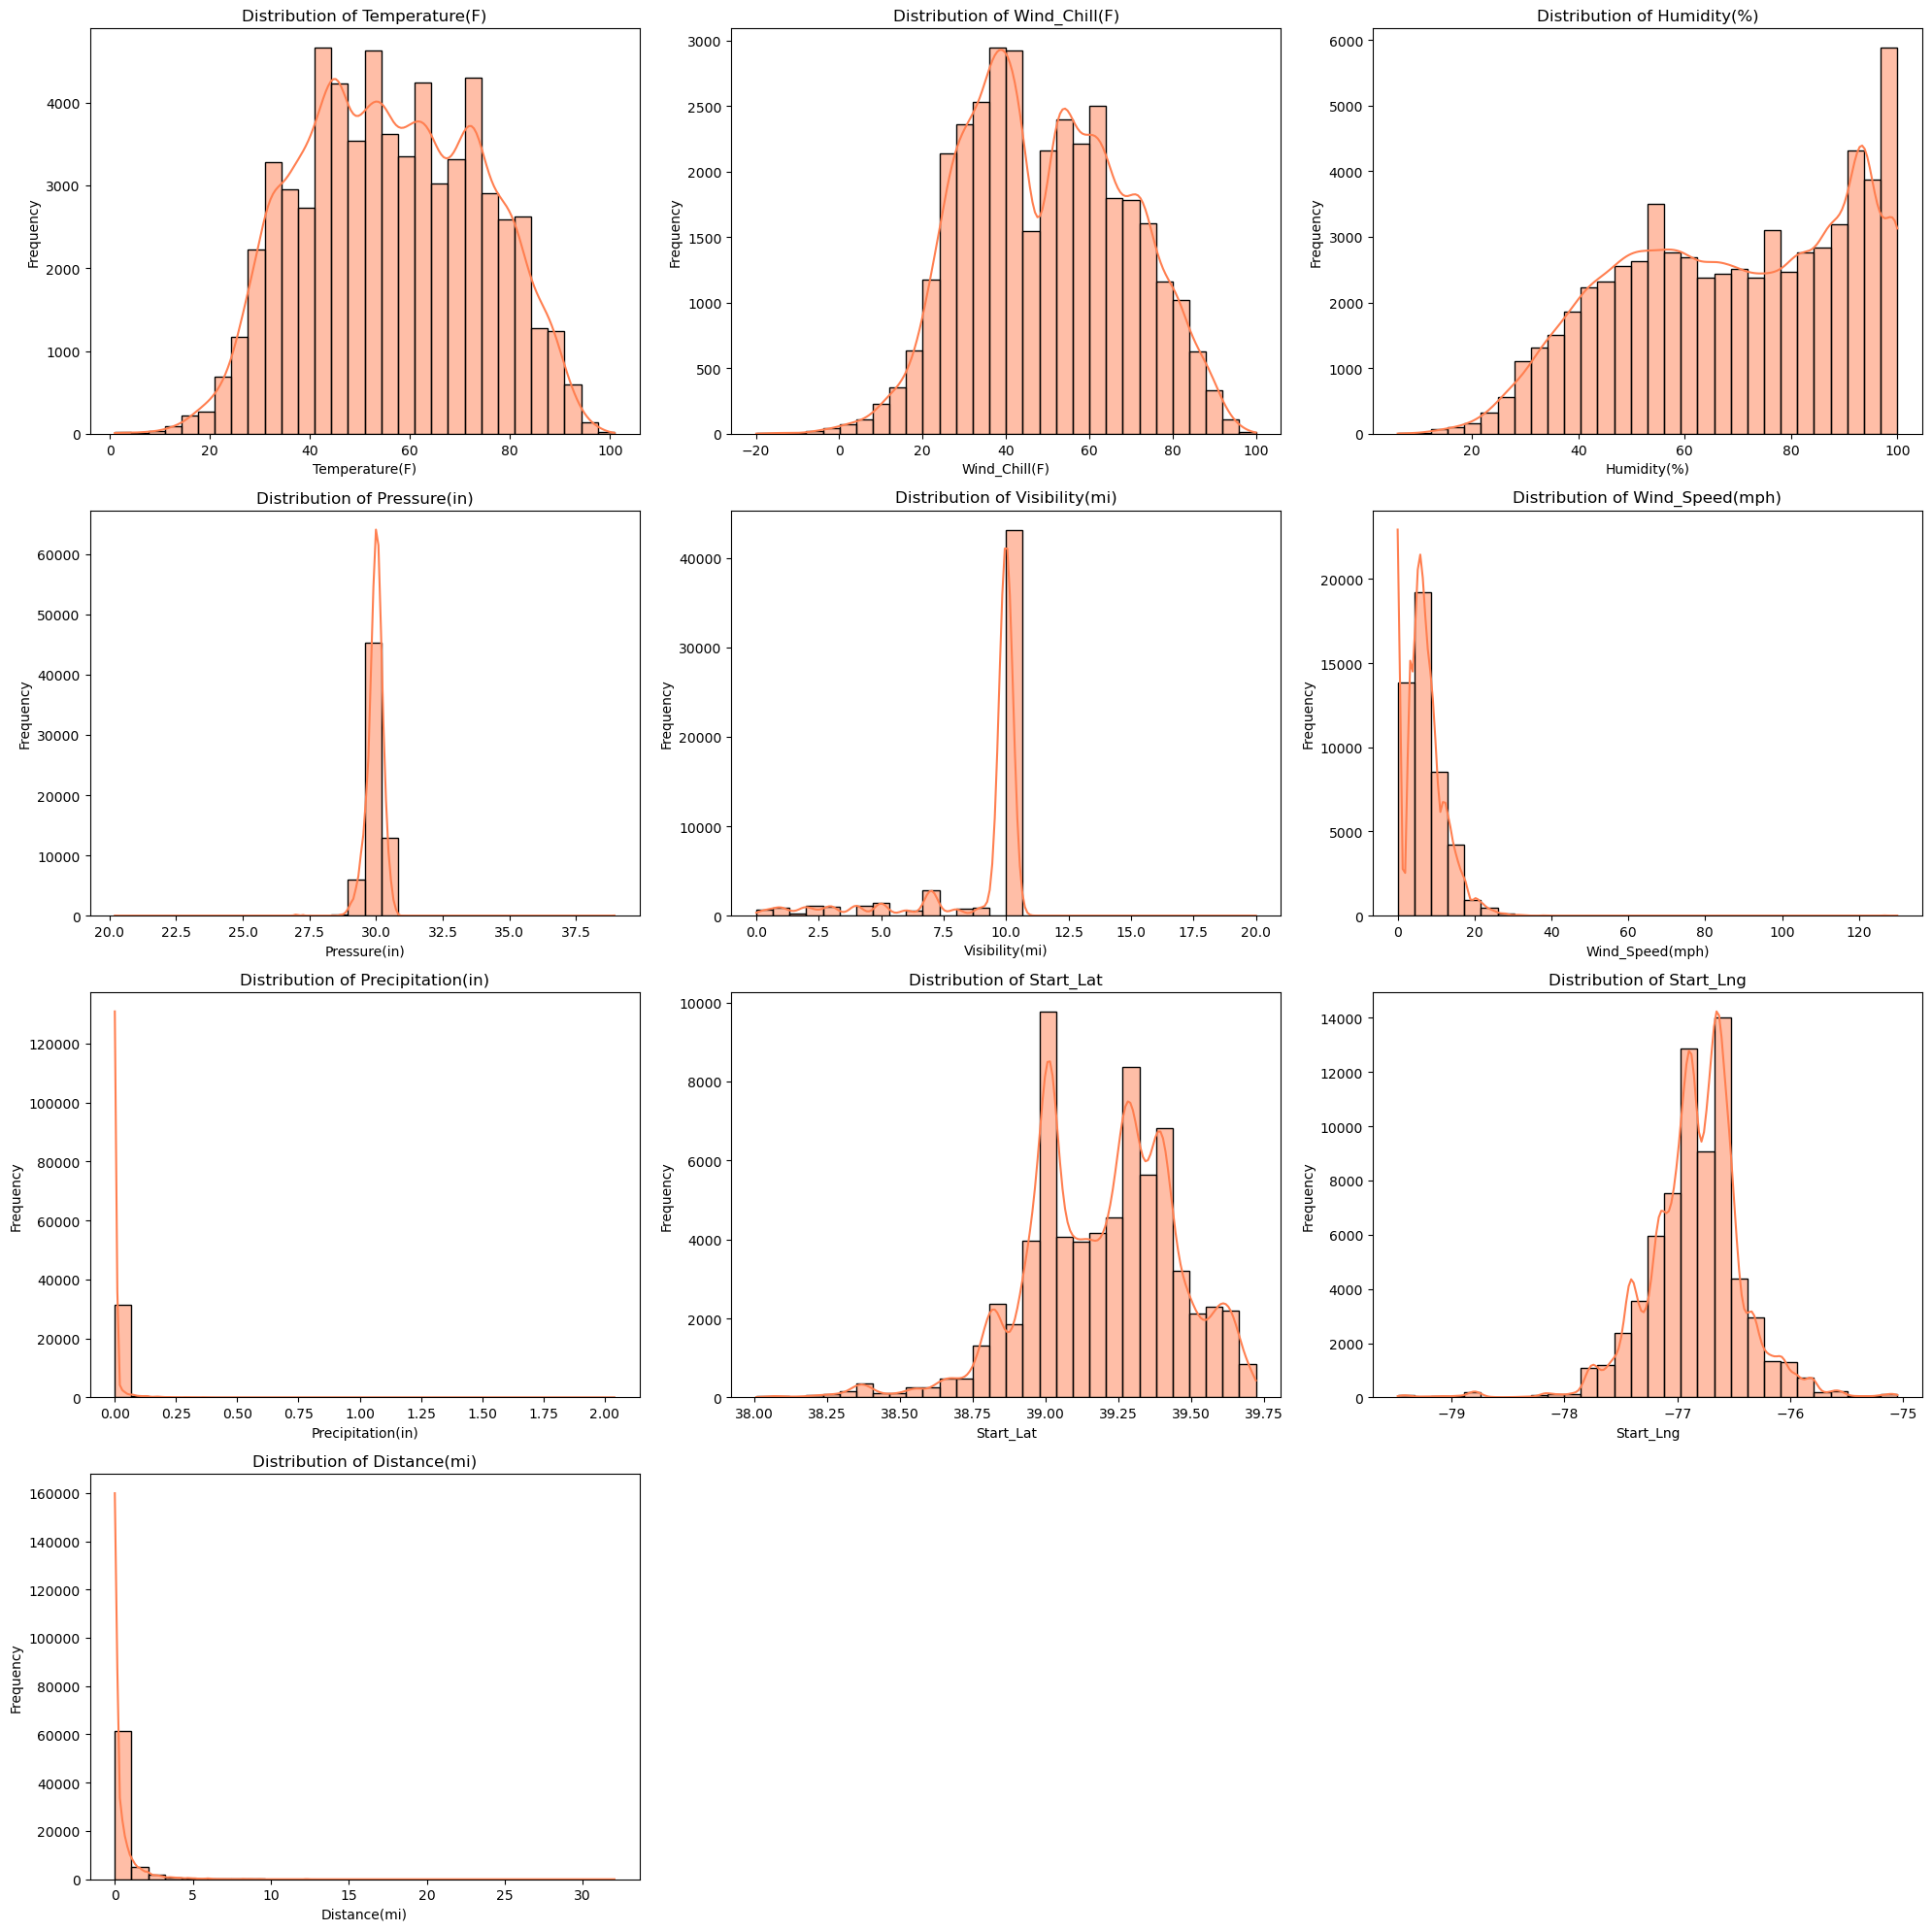

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set of columns to visualize
columns_to_plot = [
    "Temperature(F)",
    "Wind_Chill(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Visibility(mi)",
    "Wind_Speed(mph)",
    "Precipitation(in)",
    "Start_Lat",
    "Start_Lng",
    "Distance(mi)"
]

# Set up the plot grid
plt.figure(figsize=(20, 20))

# Loop through and plot each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='coral')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

After looking at the distributions, these variables are kept: 

- Pressure: good distribution, imputed using mean, outliers removed
- Wind speed: good distribution, imputed using median, outliers removed
- Temperature: good distribution, removing all rows with NA's
- Humidity: good distribution, removing all rows with NA's
- Start_Lat and Start_lng: good distribution, no missing values

In [7]:
# Strip column names just in case of leading/trailing whitespace
df.columns = df.columns.str.strip()

# Pressure imputation (mean)
df.fillna({"Pressure(in)": df["Pressure(in)"].mean()}, inplace=True)
# Remove outliers in Pressure
df = df[(df["Pressure(in)"] >= 28.5) & (df["Pressure(in)"] <= 31.5)]


# Wind Speed imputation (median)
df.fillna({"Wind_Speed(mph)": df["Wind_Speed(mph)"].median()}, inplace=True)
# Remove outliers in Wind Speed
df = df[df["Wind_Speed(mph)"] < 20]


Dropping: 

- Wind_chill: dropped as it has a very similar distribution to Temperature, and near 50% of the data is missing.
- Precipitation: dropped as there is no distribution, and it has a lot of missing values.
- Visibility(mi): poor distibution, many missing values
- Distance(mi): poor distribution

In [8]:
df.drop(["Precipitation(in)", "Wind_Chill(F)", "Visibility(mi)", "Distance(mi)"], axis=1, inplace=True)


# Dropping rows with missing values (Temperature & Humidity)
df.dropna(axis = 0,inplace=True)

Visualizing distribution again:

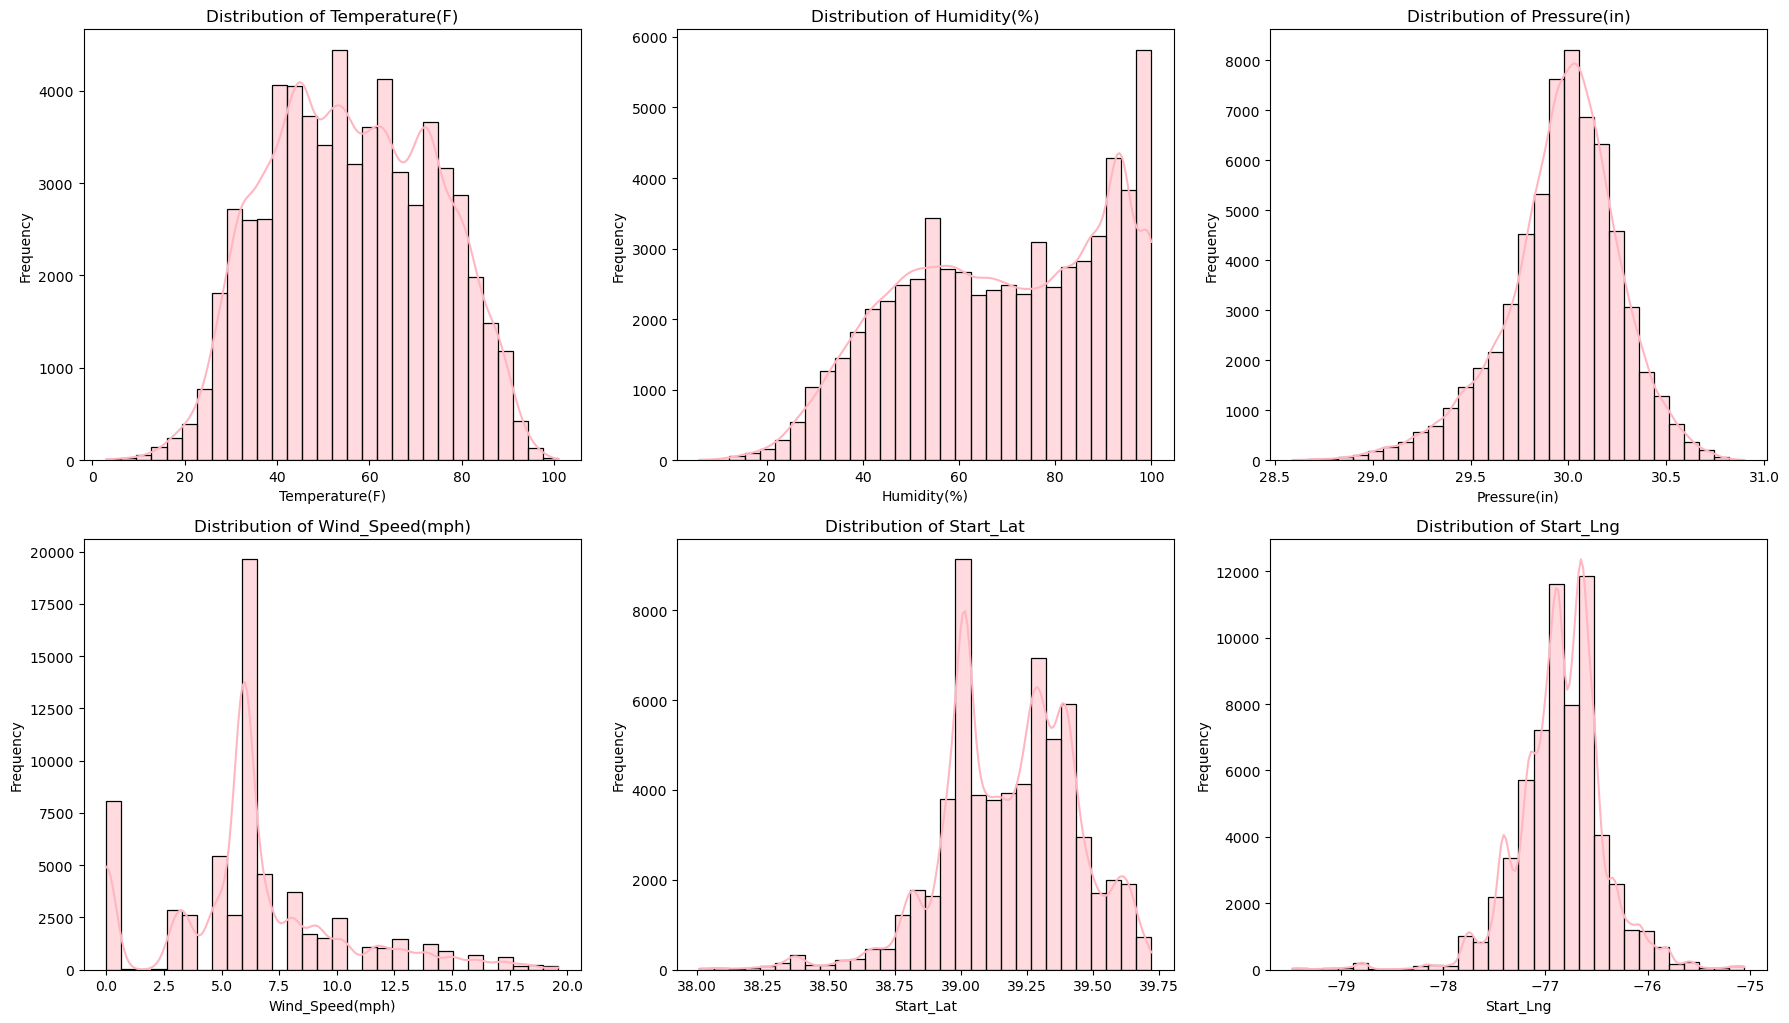

In [9]:
# Visualizing distributions:
columns_to_plot = [
    "Temperature(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Wind_Speed(mph)",
    "Start_Lat",
    "Start_Lng"
]

# Set up the plot grid
plt.figure(figsize=(18, 15))

# Loop through and plot each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='lightpink')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Checking the new shape:

In [10]:
print(df.isna().sum())
print(df.shape)

Severity                 0
Start_Lat                0
Start_Lng                0
Side                     0
City                     0
County                   0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Street_Type              0
dtype: int64
(62823, 30)


# Number of unique values per column:

As seen below, some columns have too many unique values, therefore some of these features will be dropped. 

In [11]:
print(df.dtypes)

Severity                   int64
Start_Lat                float64
Start_Lng                float64
Side                      object
City                      object
County                    object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Wind_Direction            object
Wind_Speed(mph)          float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Calming             bool
Traffic_Signal              bool
Turning_Loop                bool
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_Twilight         object
Astronomical_Twilight     object
Street_Type               object
dtype: obj

In [12]:
for column in df:
    print(f" Column: {column}, \n # unique: {df[column].nunique()}")

 Column: Severity, 
 # unique: 3
 Column: Start_Lat, 
 # unique: 25185
 Column: Start_Lng, 
 # unique: 25235
 Column: Side, 
 # unique: 2
 Column: City, 
 # unique: 333
 Column: County, 
 # unique: 28
 Column: Temperature(F), 
 # unique: 518
 Column: Humidity(%), 
 # unique: 95
 Column: Pressure(in), 
 # unique: 223
 Column: Wind_Direction, 
 # unique: 11
 Column: Wind_Speed(mph), 
 # unique: 32
 Column: Weather_Condition, 
 # unique: 22
 Column: Amenity, 
 # unique: 2
 Column: Bump, 
 # unique: 2
 Column: Crossing, 
 # unique: 2
 Column: Give_Way, 
 # unique: 2
 Column: Junction, 
 # unique: 2
 Column: No_Exit, 
 # unique: 2
 Column: Railway, 
 # unique: 2
 Column: Roundabout, 
 # unique: 2
 Column: Station, 
 # unique: 2
 Column: Stop, 
 # unique: 2
 Column: Traffic_Calming, 
 # unique: 2
 Column: Traffic_Signal, 
 # unique: 2
 Column: Turning_Loop, 
 # unique: 1
 Column: Sunrise_Sunset, 
 # unique: 2
 Column: Civil_Twilight, 
 # unique: 2
 Column: Nautical_Twilight, 
 # unique: 2
 C

In [13]:
# Remove columns with only one unique value (e.g., Turning_Loop)
df = df.loc[:, df.nunique() > 1]

We must observe the distributions of the situational variables to see if we should drop or keep the varibles. Most of them are binary, others have 10 or 11 unique values.

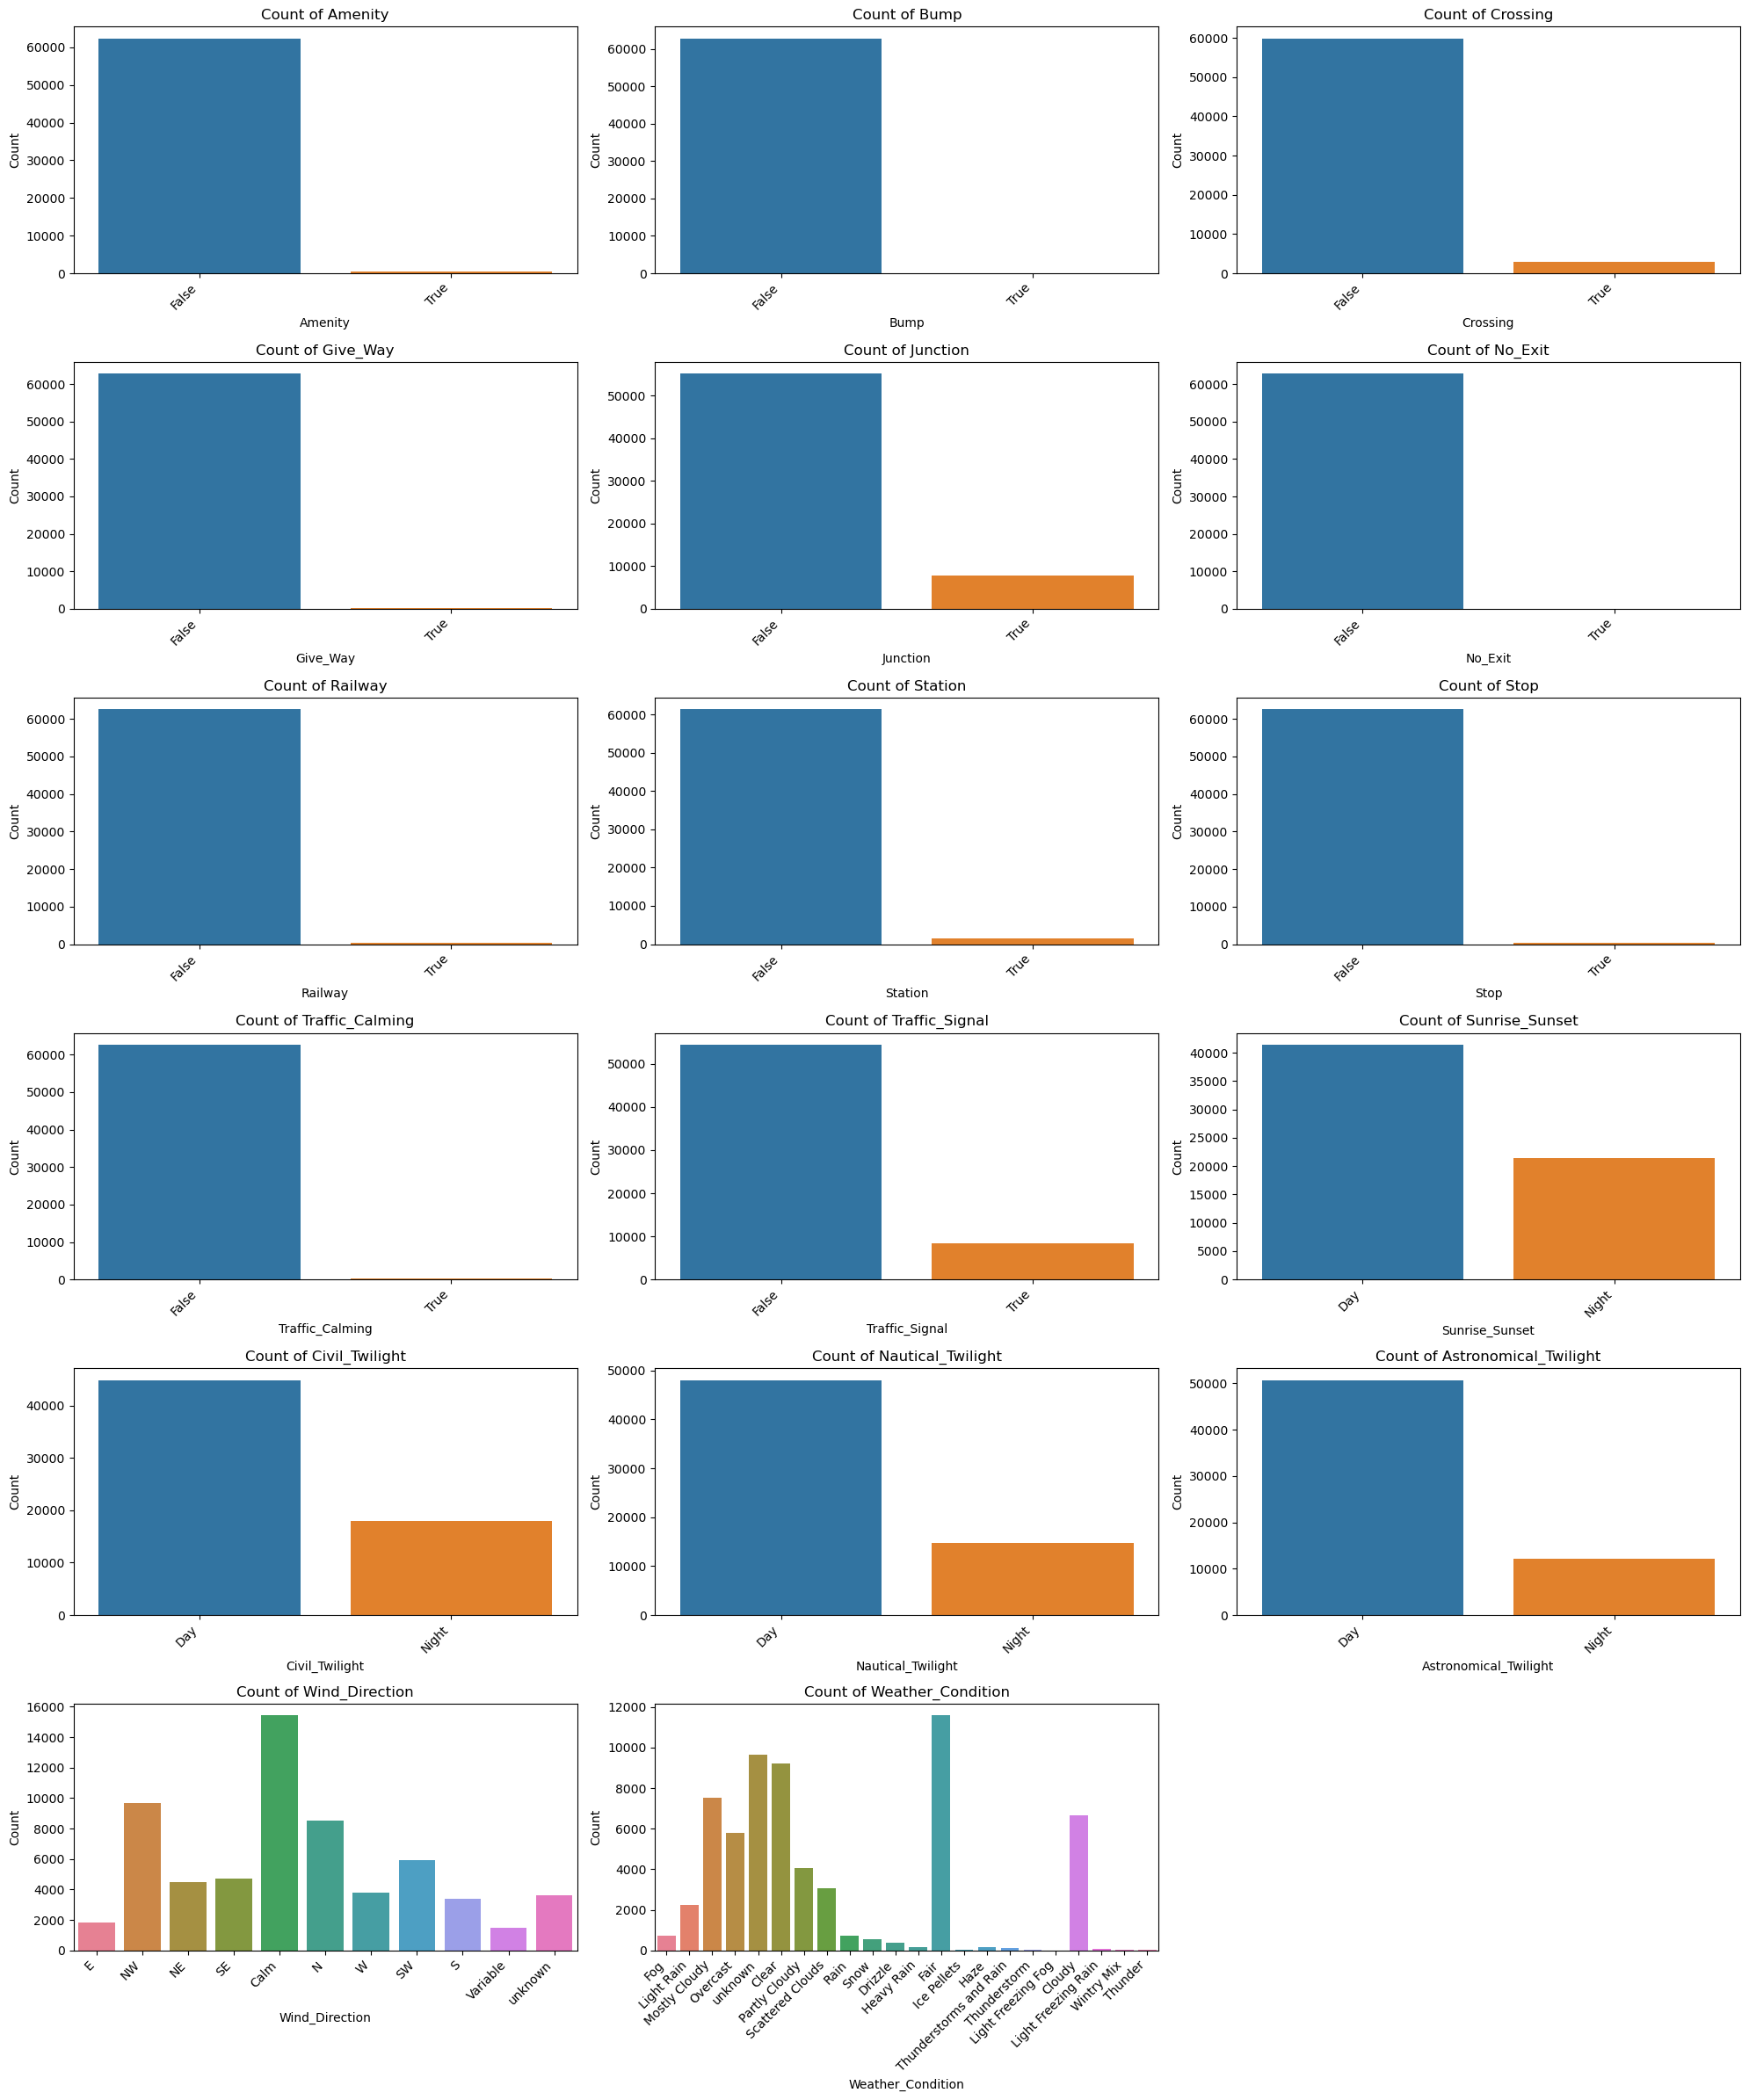

In [14]:
# observing the distributions of the categorical features with just two values


# Columns to plot (excluding those with only one unique value)
categorical_columns = [
    "Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit",
    "Railway", "Station", "Stop", "Traffic_Calming", "Traffic_Signal",
    "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight",
    "Wind_Direction", "Weather_Condition"]

# Set up the plot grid
plt.figure(figsize=(20, 24))

# Loop through and create a countplot for each
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=col, hue=col, legend=False)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Based on the graphs above, the following features are being dropped due to high class imbalance: 

In [15]:
df.drop([
    "City",
    "County",
    "Amenity", 
    "Bump", 
    "Crossing",
    "Give_Way", 
    "Junction",
    "No_Exit", 
    "Railway", 
    "Station", 
    "Stop", 
    "Traffic_Calming",
    "Traffic_Signal"], axis=1, inplace=True)

We need to fix the distribution and remove outliers of weather_condition:

In [16]:
weather_counts = df["Weather_Condition"].value_counts()
print(weather_counts)

Weather_Condition
Fair                      11583
unknown                    9668
Clear                      9207
Mostly Cloudy              7510
Cloudy                     6672
Overcast                   5801
Partly Cloudy              4046
Scattered Clouds           3047
Light Rain                 2226
Fog                         732
Rain                        705
Snow                        567
Drizzle                     377
Haze                        177
Heavy Rain                  168
Thunderstorms and Rain      131
Light Freezing Rain          66
Thunder                      42
Wintry Mix                   33
Ice Pellets                  29
Thunderstorm                 29
Light Freezing Fog            7
Name: count, dtype: int64


In [17]:
# Values over 700 is count stay
threshold = 700
common_conditions = weather_counts[weather_counts >= threshold].index

# Step 2: Set threshold and extract common categories
threshold = 700
common_conditions = weather_counts[weather_counts >= threshold].index

# Replace less frequent categories with "Other"
# Code learned in my data visualization class this semester
df["Weather_Condition"] = df["Weather_Condition"].apply(
    lambda x: x if x in common_conditions else "Other"
)

# Confirm the result
print(df["Weather_Condition"].value_counts())

Weather_Condition
Fair                11583
unknown              9668
Clear                9207
Mostly Cloudy        7510
Cloudy               6672
Overcast             5801
Partly Cloudy        4046
Scattered Clouds     3047
Light Rain           2226
Other                1626
Fog                   732
Rain                  705
Name: count, dtype: int64


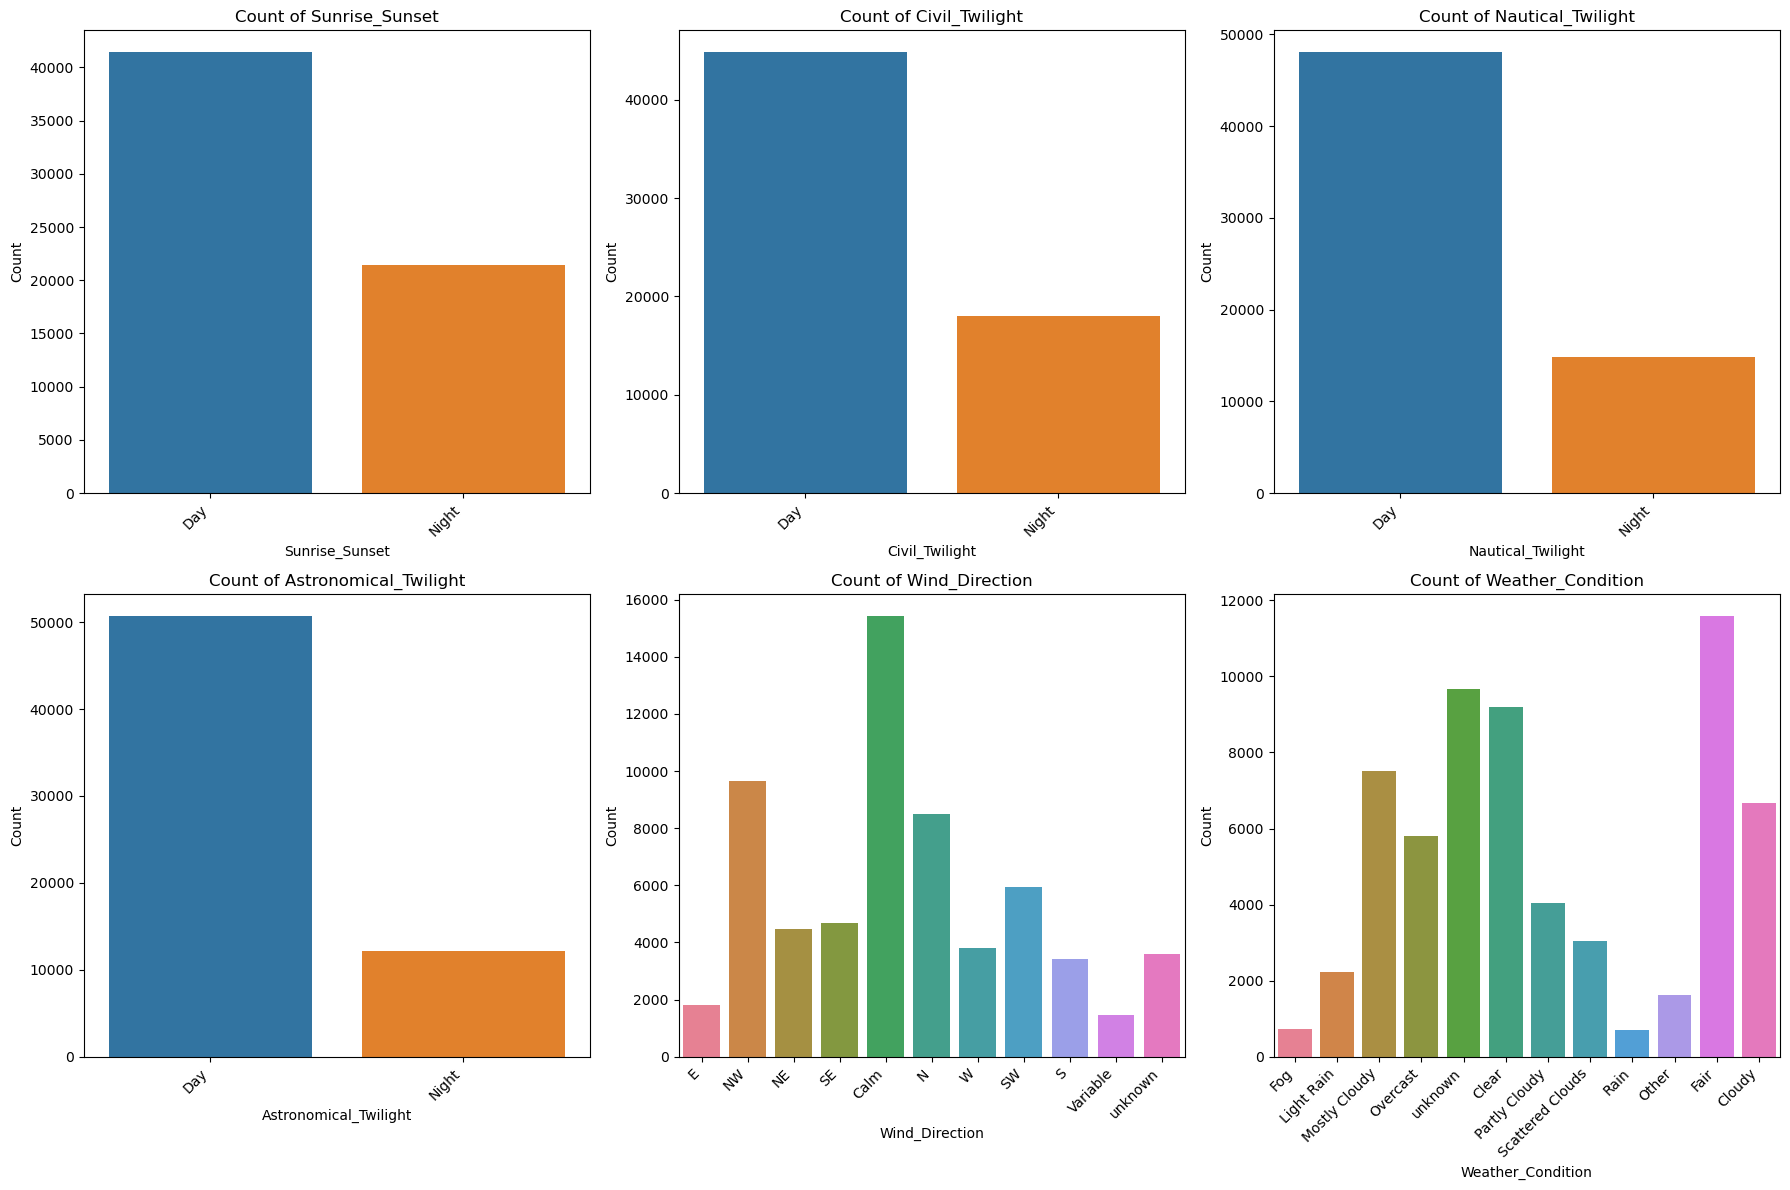

In [18]:
# Visualizing again:
categorical_columns = [
    "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight",
    "Wind_Direction", "Weather_Condition"]

# Set up the plot grid
plt.figure(figsize=(18, 12))

# Loop through and create a countplot for each
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue=col, legend=False)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [19]:
print(df.columns)

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Side', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Roundabout', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Street_Type'],
      dtype='object')


# One Hot Encoding

As seen above, all features are either integers, floats, booleans, or objects with just two categories. This objects will now be one-hot-encoded. 


In [20]:
# Onehotencoding the object values
df = pd.get_dummies(df,drop_first=True)

In [21]:
print(df.columns)

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Wind_Speed(mph)', 'Roundabout', 'Side_R',
       'Wind_Direction_E', 'Wind_Direction_N', 'Wind_Direction_NE',
       'Wind_Direction_NW', 'Wind_Direction_S', 'Wind_Direction_SE',
       'Wind_Direction_SW', 'Wind_Direction_Variable', 'Wind_Direction_W',
       'Wind_Direction_unknown', 'Weather_Condition_Cloudy',
       'Weather_Condition_Fair', 'Weather_Condition_Fog',
       'Weather_Condition_Light Rain', 'Weather_Condition_Mostly Cloudy',
       'Weather_Condition_Other', 'Weather_Condition_Overcast',
       'Weather_Condition_Partly Cloudy', 'Weather_Condition_Rain',
       'Weather_Condition_Scattered Clouds', 'Weather_Condition_unknown',
       'Sunrise_Sunset_Night', 'Civil_Twilight_Night',
       'Nautical_Twilight_Night', 'Astronomical_Twilight_Night',
       'Street_Type_BeltwayN', 'Street_Type_BeltwayS', 'Street_Type_BeltwayW',
       'Street_Type_Highway', 'Street_Type_Hig

## Choosing Scaler 
The data will be scaled during the machine learning process. The following section will help with choosing the best scaler. One must check if the features (that are continuous/floats) have outliers; MinMax scaler should be used if there are not any outliers, StandardScaler will be used otherwise. 


<Axes: ylabel='Temperature(F)'>

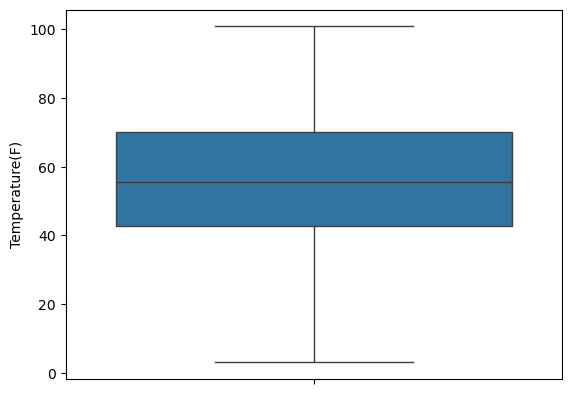

In [22]:
sns.boxplot(df['Temperature(F)'])

<Axes: ylabel='Humidity(%)'>

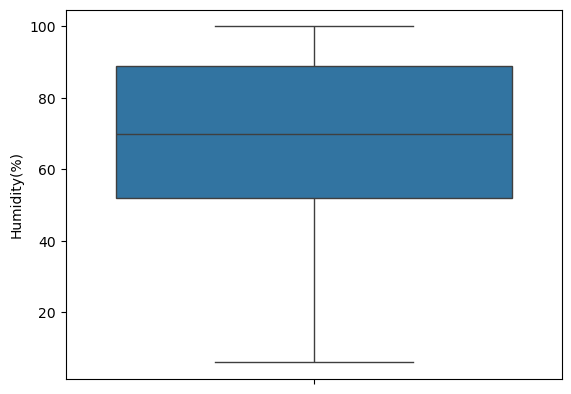

In [23]:
sns.boxplot(df['Humidity(%)'])

<Axes: ylabel='Pressure(in)'>

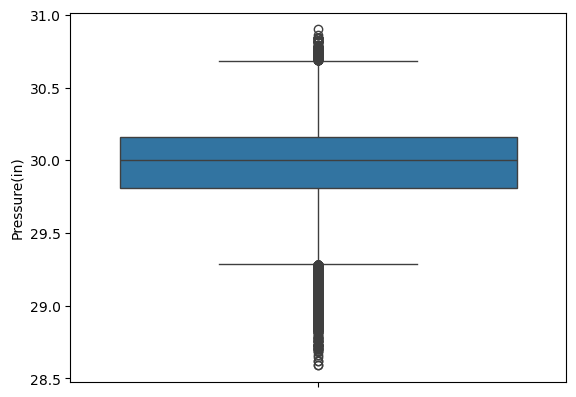

In [24]:
sns.boxplot(df['Pressure(in)'])

As seen above, distance and pressure have a high amount of outliers, therefore StandardScaler will be used. This step will be done in the python file.

In order for scaling to be done properly, all boolean features need to be converted to integers.

In [25]:
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

df.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Roundabout,Side_R,Wind_Direction_E,...,Street_Type_HighwayN,Street_Type_HighwayS,Street_Type_HighwayW,Street_Type_InterstateE,Street_Type_InterstateN,Street_Type_InterstateS,Street_Type_InterstateW,Street_Type_Tunnel,Street_Type_large_local,Street_Type_local
0,1,39.152046,-76.645584,57.9,100.0,29.75,8.1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,2,39.152046,-76.645584,57.9,100.0,29.75,8.1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,39.481083,-76.249626,59.0,100.0,29.72,3.5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,39.158756,-76.718475,61.0,100.0,29.68,3.5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,39.636391,-77.710457,54.0,97.0,29.71,5.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1


# Saving Data as CSV

Pre-processed data may now be saved as a csv, one for the train set and one for the test set, ready to be used to generate the best machine learning process. 

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=42, stratify=df["Severity"])

# Save the split datasets to CSV files
train_set.to_csv("mdtraffic_train.csv", index=False)
test_set.to_csv("mdtraffic_test.csv", index=False)

print("Train and test sets saved successfully.")
print("Train shape:", train_set.shape)
print("Test shape:", test_set.shape)

Train and test sets saved successfully.
Train shape: (43976, 49)
Test shape: (18847, 49)
